# PARTIE 1 : EDA et prétraitement des données

# A. Nettoyage des données

## Import librairies

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from datetime import datetime

import warnings
warnings.filterwarnings("ignore")

## Lecture des données

### Examination des colonnes :

- *Store*: identifiant unique d'un magasin (les données concernent 20 magasins distincts)

- *Weekly_Sales*: les ventes hebdomadaires d'un magasin donné (il est en moyenne de 1,25 millions de dollars)

- *Date*: les ventes sont relevées en fin de semaine les vendredis (les données concernent 2010, 2011 et 2012)

- *Temperature*: elle est en unité Kelvin utilisée en Amérique

- *Fuel_Price*: le prix du gallon d'essence (1 gallon = 3,8 litres)

- *CPI*: le Consumer Price Index mesure l'inflation

- *Unemployment*: le taux de chômage dans le pays

- *Holiday_Flag*: correspond aux jours fériés en Amérique  (il vaut 1 lorsqu'il s'agit d'un jour de fête, autrement il vaut 0)

In [50]:
dataset = pd.read_csv('./src/Walmart_Store_sales.csv')
dataset.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,6.0,18-02-2011,1572117.54,NaN,59.61,3.045,214.777523,6.858
1,13.0,25-03-2011,1807545.43,0.0,42.38,3.435,128.616064,7.470
2,17.0,27-07-2012,NaN,0.0,NaN,NaN,130.719581,5.936
3,11.0,NaN,1244390.03,0.0,84.57,NaN,214.556497,7.346
4,6.0,28-05-2010,1644470.66,0.0,78.89,2.759,212.412888,7.092


In [51]:
print(dataset.shape, '\n')
dataset.info()

(150, 8) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         150 non-null    float64
 1   Date          132 non-null    object 
 2   Weekly_Sales  136 non-null    float64
 3   Holiday_Flag  138 non-null    float64
 4   Temperature   132 non-null    float64
 5   Fuel_Price    136 non-null    float64
 6   CPI           138 non-null    float64
 7   Unemployment  135 non-null    float64
dtypes: float64(7), object(1)
memory usage: 9.5+ KB


In [52]:
print('Number of distinct Walmart stores:', dataset['Store'].nunique())

Number of distinct Walmart stores: 20


## Données manquantes

Il est possible de retrouver les valeurs manquantes pour les colonnes :
- *Holiday_Flag* :  puisque nous connaissons la liste des jours fériés en Amérique du Nord  

- *Date* : en observant les champs *CPI* et *Fuel_Price*

In [53]:
print('Number of missing values per column:')
dataset.isna().sum()

Number of missing values per column:


Store            0
Date            18
Weekly_Sales    14
Holiday_Flag    12
Temperature     18
Fuel_Price      14
CPI             12
Unemployment    15
dtype: int64

In [54]:
dataset_mv = dataset.copy()

## Recherche des valeurs manquantes

### Holiday_flag manquants

Il n'y a pas de jours fériés dans la liste. Nous remplaçons les valeurs NaN par 0.

In [55]:
missing_holiday_flag = dataset_mv[(dataset_mv['Holiday_Flag'].isna() == True) & (dataset_mv['Date'].isna() == False)]
missing_holiday_flag

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,6.0,18-02-2011,1572117.54,NaN,59.61,3.045,214.777523,6.858
15,6.0,30-04-2010,1498080.16,NaN,68.91,2.780,211.894272,7.092
43,7.0,26-08-2011,629994.47,NaN,57.60,3.485,194.379637,8.622
48,1.0,05-08-2011,1624383.75,NaN,91.65,3.684,215.544618,7.962
53,14.0,25-03-2011,1879451.23,NaN,41.76,3.625,184.994368,8.549
73,1.0,27-08-2010,1449142.92,NaN,85.22,2.619,211.567306,7.787
90,9.0,09-07-2010,485389.15,NaN,78.51,2.642,214.656430,6.442
109,1.0,09-12-2011,NaN,NaN,43.93,3.158,218.961846,7.866
118,9.0,18-06-2010,513073.87,NaN,82.99,2.637,215.016648,6.384
136,4.0,08-07-2011,2066541.86,NaN,84.59,3.469,129.112500,5.644


In [56]:
missing_holiday_flag_list = missing_holiday_flag.index.tolist()
for i in missing_holiday_flag_list:
    dataset_mv.iloc[i, 3] = 0

### Dates manquantes

Nous remarquons que les observations qui partagent le même CPI partagent aussi la même date.

--> Nous pouvons déduire et compléter la date manquante :

In [57]:
CPI_same = dataset_mv[dataset_mv.duplicated(['CPI'], keep=False)][dataset_mv['CPI'].isna() == False].sort_values(by='CPI')
CPI_same

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
72,13.0,10-12-2010,2461468.35,0.0,36.78,2.817,126.793400,7.795
103,4.0,10-12-2010,2302504.86,0.0,42.40,2.860,126.793400,7.127
57,4.0,07-01-2011,NaN,0.0,NaN,2.980,127.191774,6.510
65,10.0,NaN,1714309.90,NaN,43.43,3.287,127.191774,8.744
68,12.0,12-08-2011,955913.68,0.0,91.04,3.701,129.201581,13.503
128,13.0,12-08-2011,1970341.38,0.0,75.95,3.606,129.201581,6.877


In [58]:
dataset_mv.iloc[65,1] = '07-01-2011'
dataset_mv.iloc[65, 3] = 0

Nous remarquons que les observations qui partagent le même prix de l'essence sont susceptibles de partager la même date. 

Pour confimer ou infirmer cela, nous pouvons nous aider des valeurs de *CPI* et *Unemployment*. Si les valeurs sont proches il est probable qu'il s'agit de la même date.

--> Nous pouvons déduire et compléter les dates manquantes :

In [59]:
Fuel_same = dataset_mv[dataset_mv.duplicated(['Fuel_Price'], keep=False)][dataset_mv['Fuel_Price'].isna() == False].sort_values(by='Fuel_Price')
Fuel_same

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
44,1.0,12-02-2010,1641957.44,1.0,38.51,2.548,211.242170,8.106
107,8.0,12-02-2010,994801.40,1.0,33.34,2.548,214.621419,6.299
56,8.0,27-08-2010,888816.78,0.0,74.92,2.619,214.936279,6.315
73,1.0,27-08-2010,1449142.92,0.0,85.22,2.619,211.567306,7.787
118,9.0,18-06-2010,513073.87,0.0,82.99,2.637,215.016648,6.384
100,3.0,18-06-2010,364076.85,0.0,83.52,2.637,214.785826,7.343
46,5.0,30-07-2010,268929.03,0.0,82.46,2.640,211.927001,6.496
58,6.0,30-07-2010,1532308.78,0.0,NaN,2.640,212.894485,6.973
145,14.0,18-06-2010,2248645.59,0.0,72.62,2.780,182.442420,8.899
15,6.0,30-04-2010,1498080.16,0.0,68.91,2.780,211.894272,7.092


In [60]:
dataset_mv.iloc[9,1] = '24-02-2012'
dataset_mv.iloc[91,1] = '18-05-2012'
dataset_mv.iloc[81,1] = '18-05-2012'
dataset_mv.iloc[89,1] = '27-05-2011'

In [61]:
dataset_clean = dataset_mv.copy()

## Suppression des valeurs manquantes

Nous modifions le format de la date pour pouvoir l'exploiter (de string à datetime).  

Ceci nous permettra de déterminer s'il est possible de retrouver les autres dates manquantes.

In [62]:
dataset_clean['date_temp'] = ''

for index, value in enumerate(dataset_clean['Date']):
    if value == value:
        dataset_clean['date_temp'][index] = datetime.strptime(value,'%d-%m-%Y').date()
    else: 
        dataset_clean['date_temp'][index] = np.nan

In [63]:
dataset_clean.drop(['Date'], axis=1, inplace=True)
dataset_clean.rename(columns={'date_temp': 'Date'}, inplace=True)
reorder_column = ['Store', 'Date', 'Weekly_Sales','Holiday_Flag','Temperature', 'Fuel_Price', 'CPI', 'Unemployment']
dataset_clean = dataset_clean.reindex(columns=reorder_column)

In [64]:
dataset_clean.sort_values(by=['Store', 'CPI']).head(15)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
95,1.0,2010-05-14,1494251.50,0.0,74.78,2.854,210.337426,7.808
44,1.0,2010-02-12,1641957.44,1.0,38.51,2.548,211.242170,8.106
73,1.0,2010-08-27,1449142.92,0.0,85.22,2.619,211.567306,7.787
133,1.0,2010-09-24,NaN,0.0,80.94,NaN,211.597225,7.787
123,1.0,2011-05-27,1466046.67,0.0,NaN,3.786,215.503788,7.682
48,1.0,2011-08-05,1624383.75,0.0,91.65,3.684,215.544618,7.962
78,1.0,2011-11-18,1539483.70,0.0,62.25,3.308,218.220509,7.866
109,1.0,2011-12-09,NaN,0.0,43.93,3.158,218.961846,7.866
13,1.0,2012-03-16,1677472.78,0.0,64.74,3.734,221.211813,7.348
42,1.0,NaN,1661767.33,1.0,NaN,3.730,222.439015,6.908


<ins>Résultat</ins> : 

Nous constatons qu'il est compliqué de retrouver les valeurs des dates manquantes restantes, et ce même en ordonnant les données par magasin et par date.

La date est une donnée essentielle puisqu'elle détermine directement le chiffre d'affaires hebdomadaire d'un magasin.

--> Nous supprimons les observations où la date est absente.  
--> Nous supprimons les observations où le chiffre d'affaires est absent.

Cela concerne 27 observations soit 18% du jeu de données.

In [65]:
missing_date = dataset_clean[dataset_clean['Date'].isna() == True].index.tolist()
missing_sales = dataset_clean[dataset_clean['Weekly_Sales'].isna() == True].index.tolist()
rows_to_drop = missing_date + missing_sales

print('Number of rows to delete:', len(rows_to_drop))
print('Percentage:', round(len(rows_to_drop)/dataset.shape[0]*100,2), '%')

Number of rows to delete: 27
Percentage: 18.0 %


In [66]:
dataset_clean = dataset_clean.drop(rows_to_drop, axis=0)
dataset_clean.reset_index(drop=True, inplace=True)

print(dataset_clean.shape)
dataset_clean.isna().sum()

(123, 8)


Store            0
Date             0
Weekly_Sales     0
Holiday_Flag     0
Temperature     12
Fuel_Price      11
CPI             10
Unemployment    11
dtype: int64

## Ajout de colonnes relatives à la date

In [67]:
dataset_clean['Year'] = ''
dataset_clean['Month'] = ''
dataset_clean['Day'] = ''
dataset_clean['Dayofweek'] = ''

for index, value in enumerate(dataset_clean['Date']):
    if value == value:
        dataset_clean['Year'][index] = value.year
        dataset_clean['Month'][index] = value.month
        dataset_clean['Day'][index] = value.day
        dataset_clean['Dayofweek'][index] = value.weekday()

In [68]:
dataset_clean['Dayofweek'].value_counts()

Dayofweek
4    123
Name: count, dtype: int64

In [69]:
dataset_clean.drop(['Dayofweek'], axis=1, inplace=True)
reorder_column = ['Store', 'Date', 'Day', 'Month', 'Year', 'Weekly_Sales','Holiday_Flag','Temperature', 'Fuel_Price', 'CPI', 'Unemployment']
dataset_clean = dataset_clean.reindex(columns=reorder_column)

In [70]:
dataset_imputed = dataset_clean.copy()

## Imputation des données manquantes

Temperature, Fuel_Price, CPI et Unemployment sont des données quantitatives continues.

Nous remplaçons les données manquantes de ces colonnes par leur valeur moyenne.

In [71]:
dataset_imputed.describe(include='all')

,Store,Date,Day,Month,Year,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,123.000000,123,123.0,123.0,123.0,1.230000e+02,123.000000,111.000000,112.000000,113.000000,112.000000
unique,NaN,80,30.0,12.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-07,12.0,5.0,2010.0,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,3,11.0,17.0,51.0,NaN,NaN,NaN,NaN,NaN,NaN
mean,9.845528,NaN,NaN,NaN,NaN,1.249552e+06,0.065041,60.765946,3.304313,178.399782,7.654339
std,6.066615,NaN,NaN,NaN,NaN,6.615939e+05,0.247606,17.789311,0.480638,39.998524,1.661474
min,1.000000,NaN,NaN,NaN,NaN,2.689290e+05,0.000000,18.790000,2.514000,126.111903,5.143000
25%,4.000000,NaN,NaN,NaN,NaN,5.670360e+05,0.000000,45.465000,2.838500,131.637000,6.656750
50%,9.000000,NaN,NaN,NaN,NaN,1.295605e+06,0.000000,61.790000,3.327000,196.919506,7.477000
75%,15.000000,NaN,NaN,NaN,NaN,1.806773e+06,0.000000,75.430000,3.689750,214.878556,8.150000


In [72]:
imputed_cols = ['Temperature', 'Fuel_Price', 'CPI',	'Unemployment']
for i, col in enumerate(imputed_cols):
    missing_rows_index = dataset_imputed[dataset_imputed[col].isna() == True].index.tolist()
    for row in missing_rows_index:
        dataset_imputed.iloc[row,i+7] = round(dataset_imputed[col].mean(),2)

In [73]:
dataset_imputed.isna().sum()

Store           0
Date            0
Day             0
Month           0
Year            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [74]:
dataset_outliers = dataset_imputed.copy()

## Recherche de données aberrantes

Nous considérons comme valeurs aberrantes les données en dehors de l'intervalle :  

[(moyenne - 3x l'écart-type), (moyenne + 3x l'écart-type)]

### Chiffre d'affaires hebdomadaire

Interval: [-735229, 3234334]


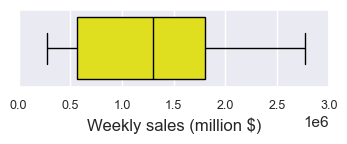

In [75]:
mean_val = dataset_outliers['Weekly_Sales'].mean()
std_val = dataset_outliers['Weekly_Sales'].std()
print(f'Interval: [{round((mean_val - 3*std_val))}, {round((mean_val + 3*std_val))}]')

fig, ax = plt.subplots(figsize=(4, 1))
sns.boxplot(x=dataset_outliers['Weekly_Sales'], ax=ax, whis=3, palette=['yellow'], linecolor='black')
plt.xticks([i for i in range(0,3500000,500000)], fontsize=9)
plt.xlabel('Weekly sales (million $)')
plt.show()

### Température

Interval: [10.09, 111.44]


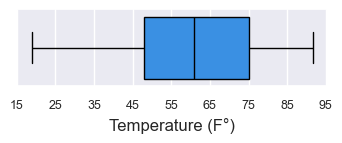

In [76]:
mean_val = dataset_outliers['Temperature'].mean()
std_val = dataset_outliers['Temperature'].std()
print(f'Interval: [{round((mean_val - 3*std_val),2)}, {round((mean_val + 3*std_val),2)}]')

fig, ax = plt.subplots(figsize=(4, 1))
sns.boxplot(x=dataset_outliers['Temperature'], ax=ax, whis=3, palette=['dodgerblue'], linecolor='black')
plt.xticks([i for i in range(15,100,10)], fontsize=9)
plt.xlabel('Temperature (F°)')
plt.show()

### Prix de l'essence

Interval: [1.93, 4.68]


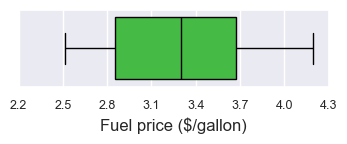

In [77]:
mean_val = dataset_outliers['Fuel_Price'].mean()
std_val = dataset_outliers['Fuel_Price'].std()
print(f'Interval: [{round((mean_val - 3*std_val),2)}, {round((mean_val + 3*std_val),2)}]')

fig, ax = plt.subplots(figsize=(4, 1))
sns.boxplot(x=dataset_outliers['Fuel_Price'], ax=ax, whis=3, palette=['limegreen'], linecolor='black')
plt.xticks([i / 10.0 for i in range(22,46,3)], fontsize=9)
plt.xlabel('Fuel price ($/gallon)')
plt.show()

### Inflation

Interval: [63.43, 293.37]


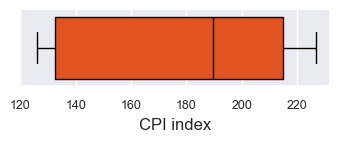

In [78]:
mean_val = dataset_outliers['CPI'].mean()
std_val = dataset_outliers['CPI'].std()
print(f'Interval: [{round((mean_val - 3*std_val),2)}, {round((mean_val + 3*std_val),2)}]')

fig, ax = plt.subplots(figsize=(4, 1))
sns.boxplot(x=dataset_outliers['CPI'], ax=ax, whis=3, palette=['orangered'], linecolor='black')
plt.xticks([i for i in range(120,240,20)], fontsize=9)
plt.xlabel('CPI index')
plt.show()

### Taux de chômage

Nous remarquons des valeurs aberrantes dans la colonne *Unemployment*. 

Interval: [2.9, 12.41]


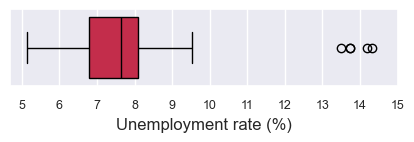

In [79]:
mean_val = dataset_outliers['Unemployment'].mean()
std_val = dataset_outliers['Unemployment'].std()
print(f'Interval: [{round((mean_val - 3*std_val),2)}, {round((mean_val + 3*std_val),2)}]')

fig, ax = plt.subplots(figsize=(5, 1))
sns.boxplot(x=dataset_outliers['Unemployment'], ax=ax, whis=3, palette=['crimson'], linecolor='black')
plt.xticks([i for i in range(5,16,1)], fontsize=9)
plt.xlabel('Unemployment rate (%)')
plt.show()

In [80]:
dataset_final = dataset_outliers.copy()

## Suppression des valeurs aberrantes

Nous supprimons les valeurs aberrantes détectées précédemment.

In [81]:
dataset_final[dataset_final['Unemployment'] > 12.41]

,Store,Date,Day,Month,Year,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
26,12.0,2011-05-06,6,5,2011,1021154.48,0.0,68.40,4.193,129.044433,13.736
54,12.0,2010-12-17,17,12,2010,1295605.35,0.0,52.77,3.236,126.879484,14.313
60,12.0,2011-08-12,12,8,2011,955913.68,0.0,91.04,3.701,129.201581,13.503
76,12.0,2011-05-27,27,5,2011,964332.51,0.0,60.77,4.087,129.062355,13.736
111,12.0,2010-09-10,10,9,2010,903119.03,1.0,83.63,3.044,126.114581,14.180


In [82]:
outliers = dataset_final[dataset_final['Unemployment'] > 12.41].index.tolist()
dataset_final.drop(outliers, axis=0, inplace=True)
dataset_final.reset_index(drop=True, inplace=True)
dataset_final.shape

(118, 11)

Interval: [4.57, 10.2]


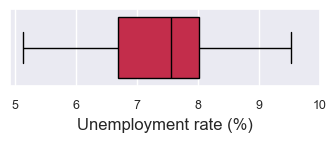

In [83]:
mean_val = dataset_final['Unemployment'].mean()
std_val = dataset_final['Unemployment'].std()
print(f'Interval: [{round((mean_val - 3*std_val),2)}, {round((mean_val + 3*std_val),2)}]')

fig, ax = plt.subplots(figsize=(4, 1))
sns.boxplot(x=dataset_final["Unemployment"], ax=ax, whis=3, palette=['crimson'], linecolor='black')
plt.xticks([i for i in range(5,11,1)], fontsize=9)
plt.xlabel('Unemployment rate (%)')
plt.show()

# B. Analyse des données

## Ventes hebdomadaires suivant l'année

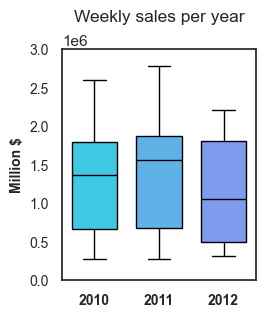

,Year,Weekly_Sales
0,2010,1.268950e+06
1,2011,1.360004e+06
2,2012,1.133822e+06


In [84]:
sns.set(rc={'figure.figsize':(2.5, 3)}, style='white')
colors = sns.color_palette('cool')
sns.boxplot(x="Year", y="Weekly_Sales", hue="Year", data=dataset_final, palette=colors, linecolor='black', width=.7)
plt.title('Weekly sales per year', fontsize=12.5, pad=20)
plt.ylabel('Million $', fontsize=10, fontweight='bold')
plt.xlabel('')
plt.yticks([i for i in range(0,3500000, 500000)], fontsize=10)
plt.xticks([i for i in range(0,3)], ['2010', '2011', '2012'], fontsize=10, fontweight='bold')
plt.legend('', frameon=False)
plt.show()

weekly_sales_per_year = dataset_final.groupby('Year')['Weekly_Sales'].mean().to_frame().reset_index()
display(weekly_sales_per_year)

## Ventes hebdomadaires suivant le mois

Nous observons que les ventes hebdomadaires varient suivant le mois.  

Elle sont bien plus élevées en décembre avec $2,27 millions/magasin en moyenne. Octobre, avril et novembre sont les mois qui enregistrent les chiffres les plus bas avec moins de $1 million/magasin.

--> <ins>Hypothèses</ins> : Les ventes sont influencées par les saisons et les activités liées à celles-ci. On remarque une alternance entre périodes de grosse consommation et périodes de faible consommation.

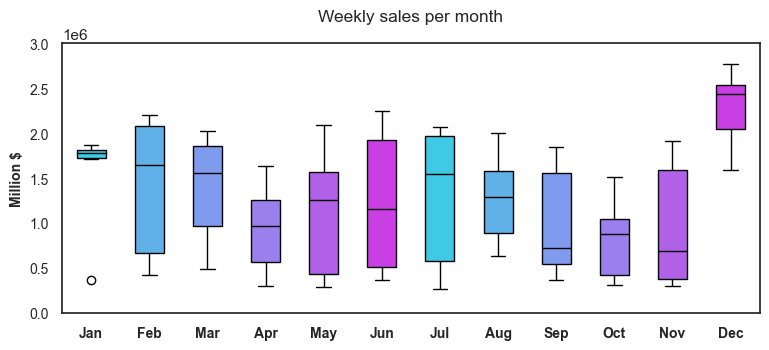

,Month,Weekly_Sales
11,12,2.279542e+06
0,1,1.552612e+06
1,2,1.438223e+06
2,3,1.399005e+06
6,7,1.331006e+06
7,8,1.289846e+06
5,6,1.193792e+06
4,5,1.101871e+06
8,9,9.939129e+05
10,11,9.501744e+05


In [85]:
sns.set(rc={'figure.figsize':(9, 3.5)}, style='white')
colors = sns.color_palette('cool')
sns.boxplot(x="Month", y="Weekly_Sales", hue="Month", data=dataset_final,  palette=colors, linecolor='black', width=.5)
plt.title('Weekly sales per month', fontsize=12.5, pad=16)
plt.ylabel('Million $', fontsize=10, fontweight='bold')
plt.xlabel('')
plt.yticks([i for i in range(0,3500000, 500000)], fontsize=10)
plt.xticks([i for i in range(0,12)], ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], fontsize=10, fontweight='bold')
plt.legend('', frameon=False)
plt.show()

weekly_sales_per_month = dataset_final.groupby('Month')['Weekly_Sales'].mean().to_frame().reset_index()
display(weekly_sales_per_month.sort_values(by='Weekly_Sales', ascending=False))

## Ventes hebdomadaires suivant le jour du mois

Nous observons que les ventes hebdomadaires varient suivant le jour du mois.

Le 10 et le 16 du mois elles sont particulièrement élevées. En revanche le 13 du mois et le 29 du mois elle sont particulièrement faibles.

--> Ceci pourrait s'expliquer par le fait que les américains reçoivent généralement leur salaire en 2 versements mensuels, au début de mois et à la moitié du mois.

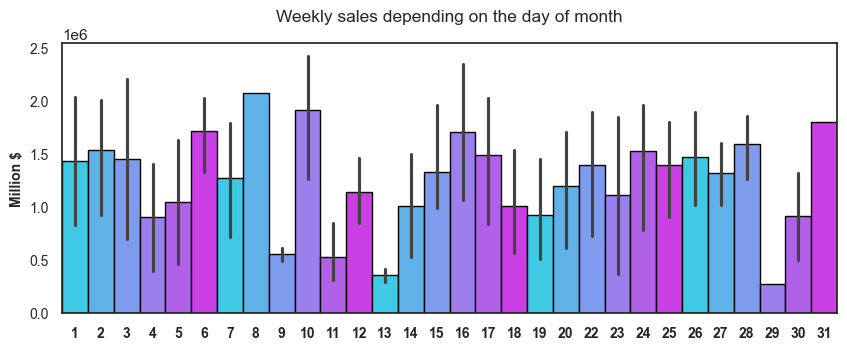

In [86]:
sns.set(rc={'figure.figsize':(10, 3.5)}, style='white')
colors = sns.color_palette('cool')
sns.barplot(x="Day", y="Weekly_Sales", hue="Day", data=dataset_final, palette=colors, edgecolor='black', width=1)
plt.title('Weekly sales depending on the day of month', fontsize=12.5, pad=16)
plt.ylabel('Million $', fontsize=10, fontweight='bold')
plt.xlabel('')
plt.yticks([i for i in range(0,2600000, 500000)], fontsize=10)
plt.xticks(fontsize=10, fontweight='bold')
plt.legend('', frameon=False)
plt.show()

## Ventes hebdomadaires suivant le magasin

Les ventes ne sont pas uniformes suivant le magasin. Certains magasins performent mieux que d'autres.

Les magasins n°4 et n°14 sont les plus performants. Ils réalisent en moyenne plus de $2 million/semaine.  
En revanche les magasins n°5 et n°3 sont les moins bons. Ils réalisent en moyenne moins de $500000/semaine.

*Note: Après nettoyage du jeu de données n'y a plus de données pour le magasin n°12.*

Number of stores: 19


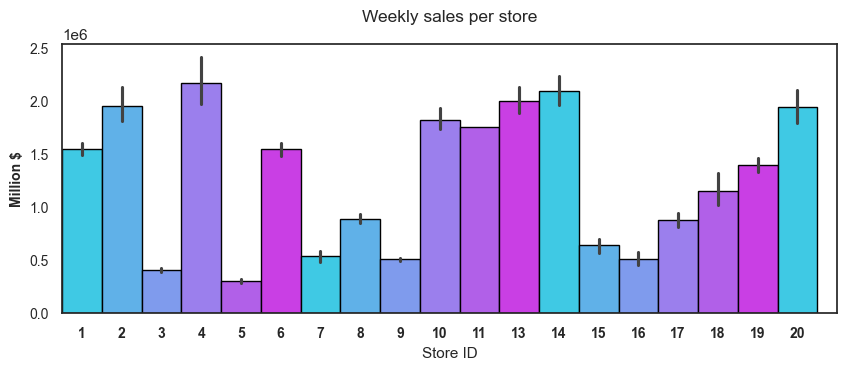

In [87]:
print('Number of stores:', len(dataset_final["Store"].unique().tolist()))
sns.set(rc={'figure.figsize':(10, 3.5)}, style='white')
colors = sns.color_palette('cool')
sns.barplot(x="Store", y="Weekly_Sales", data=dataset_final, palette=colors, edgecolor='black', width=1)           
plt.title('Weekly sales per store', fontsize=12.5, pad=16)
plt.ylabel('Million $', fontsize=10, fontweight='bold')
plt.xlabel('Store ID', fontsize=11, fontweight='normal')
plt.yticks([i for i in range(0,3000000, 500000)], fontsize=10)
plt.xticks([i for i in range(0,20)],[1,2,3,4,5,6,7,8,9,10,11,13,14,15,16,17,18,19,20,''], fontsize=10, fontweight='bold')
plt.legend('', frameon=False)
plt.show()

## Ventes hebdomadaires suivant les jours fériés

Les ventes sont en moyenne meilleures lors des jours fériés. On observe un écart de $100000 entre un jour normal et un jour férié.

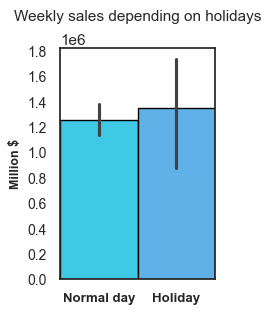

,Holiday_Flag,Weekly_Sales
0,0.0,1.253356e+06
1,1.0,1.347476e+06


In [88]:
sns.set(rc={'figure.figsize':(2, 3)}, style='white')
colors = sns.color_palette('cool')
sns.barplot(x="Holiday_Flag", y="Weekly_Sales", data=dataset_final, palette=colors, edgecolor='black', width=1)
plt.title('Weekly sales depending on holidays', fontsize=11, pad=20)
plt.ylabel('Million $', fontsize=9, fontweight='bold')
plt.xlabel('')
plt.yticks([i for i in range(0,1900000, 200000)], fontsize=10)
plt.xticks([i for i in range(0,2)], ['Normal day', 'Holiday'], fontsize=9.5, fontweight='bold')
plt.legend('', frameon=False)
plt.show()

weekly_sales_holiday = dataset_final.groupby('Holiday_Flag')['Weekly_Sales'].mean().to_frame().reset_index()
display(weekly_sales_holiday)

## Ventes & température

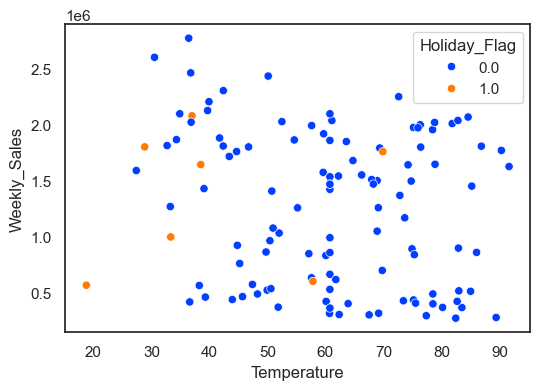

In [89]:
sns.set(rc={'figure.figsize':(6, 4)}, style='white')
colors = sns.color_palette('bright')
sns.scatterplot(data=dataset_final, x=dataset_final['Temperature'], y=dataset_final['Weekly_Sales'], hue=dataset_final['Holiday_Flag'], palette=colors)
plt.show()

## Ventes & prix de l'essence

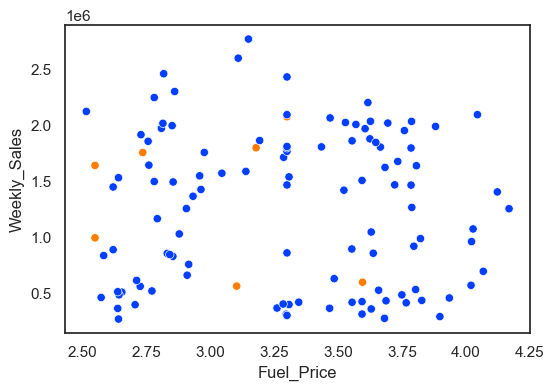

In [90]:
sns.set(rc={'figure.figsize':(6, 4)}, style='white')
colors = sns.color_palette('bright')
sns.scatterplot(data=dataset_final, x=dataset_final['Fuel_Price'], y=dataset_final['Weekly_Sales'], hue=dataset_final['Holiday_Flag'], palette=colors)
plt.legend('', frameon=False)
plt.show()

## Ventes & inflation

On observe que lorque l'index d'inflation dépasse 200, les ventes hebdomadaires ne dépassent jamais les $2,5 millions.

Au contraire, c'est lorsque l'index d'inflation est au plus bas (140) que les ventes hebdomadaires atteignent des records de plus de $2,5 millions.

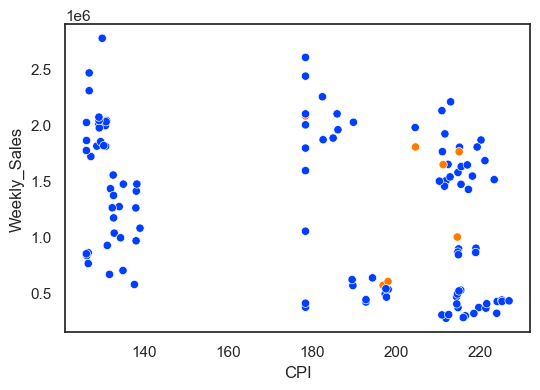

In [91]:
sns.set(rc={'figure.figsize':(6, 4)}, style='white')
colors = sns.color_palette('bright')
sns.scatterplot(data=dataset_final, x=dataset_final['CPI'], y=dataset_final['Weekly_Sales'], hue=dataset_final['Holiday_Flag'], palette=colors)
plt.legend('', frameon=False)
plt.show()

## Ventes et taux de chômage

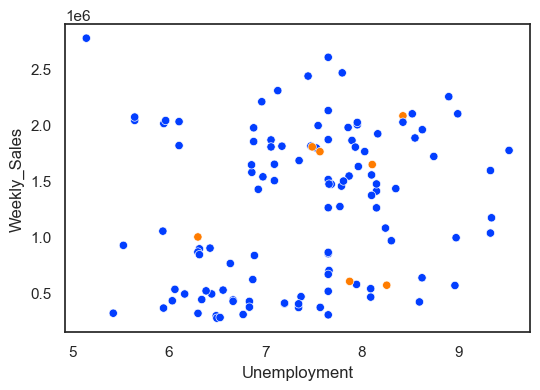

In [92]:
sns.set(rc={'figure.figsize':(6, 4)}, style='white')
colors = sns.color_palette('bright')
sns.scatterplot(data=dataset_final, x=dataset_final['Unemployment'], y=dataset_final['Weekly_Sales'], hue=dataset_final['Holiday_Flag'], palette=colors)
plt.legend('', frameon=False)
plt.show()

## Matrice de corrélation

Nous construisons la matrice de corrélation mieux voir quels facteurs impactent les ventes hebdomadaires.

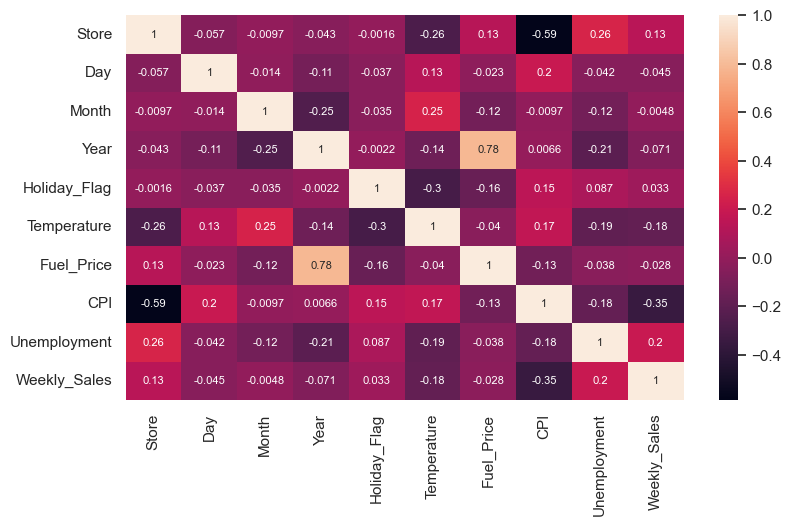

In [93]:
corr_cols = ['Store', 'Day', 'Month', 'Year', 'Holiday_Flag', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'Weekly_Sales']
corr_df = dataset_final[corr_cols]
corr = corr_df.corr()
sns.set(rc={"figure.figsize":(9, 5)})
sns.heatmap(
    corr,
    annot=True,
    annot_kws={"fontsize":8}
)
plt.show()

#### Résultats : 

- On observe que le taux de chômage a une influence positive sur les ventes hebdomadaires (coefficient de 0,20).

- L'index d'inflation a une influence négative sur les ventes hebdomadaires (coefficient de -0,35).

- La température a également une influence négative sur les ventes hebdomadaires (coefficient de -0,18).

- Les autres variables ont une influence négligeable sur les ventes.

## Enregistrement fichier csv

In [94]:
dataset_final.to_csv('./src/dataset_for_ml.csv', index=False)